In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import os
import math
from astropy.io import ascii

## 

import scipy
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score


path = os.getcwd()


### NGC 7250: comparación y media 

de los pares de valores de la galaxia NGC 7250, ya que se contaba con dos cubos de datos.

Al tener dos cubos para esta galaxia hay que tener especial cuidado para saber qué espectro/posiciones hemos eliminado en uno y otro cubo. 

Al inicio se elimina la posición 4 del cubo 2, y luego se elimina el espectro "11", que sería la antigua posición 12. Por otro lado, en el primer cubo se eliminan (por mala señal) los espectros de las posiciones 2, 4 y 12. Así, tenemos que en ambos se eliminan las Cefeidas 4 y 12, mientras que en el segundo cubo tenemos de más la número 2 (todos estos índices contando desde el 0).

Para las posiciónes coincidentes haremos la media entre los valores hallados (previa visualización de que los valores tienen cierta correlación), y se añadirá la posición 2, de la que solo hay datos del segundo cubo, al final de la lista.

{'polynomial': [array([ 1.00481037, -0.054359  ]), array([[ 0.00701102, -0.05919583],
       [-0.05919583,  0.49985893]])]}


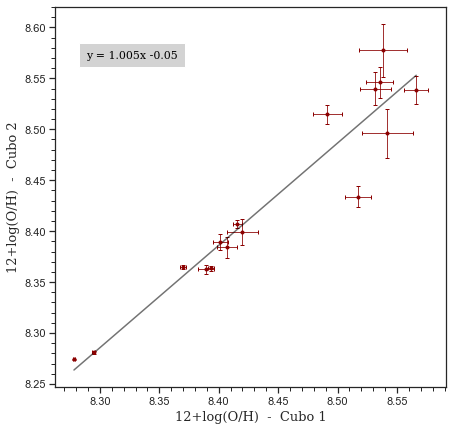


Correlación Pearson: r=0.9546711169233412, p-value=9.349959071391386e-09


In [2]:
from scipy.stats import pearsonr

sns.set_theme(style="ticks")

met_7250_1 = np.loadtxt(path+'\\NGC7250\met_7250.txt')
met_7250_2 = np.loadtxt(path+'\\NGC7250_new\met_7250_new.txt')
err_7250_1 = np.loadtxt(path+'\\NGC7250\err_met_7250.txt')
err_7250_2 = np.loadtxt(path+'\\NGC7250_new\err_met_7250_new.txt')

# El espectro 2 es la diferencia entre ambos archivos
# teniendo en cuenta que al original (19 espectros) se le eliminan el 2, 4 y 12
# y al _new se le elimina al principio el 4 (18 espectros) y después el 11, que
# se correspondería con el 12 si no se elimina el 4. Entonces, el espectro _new
# tiene de más el 2, por lo que se le elimina para comparar y hacer media entre ambos

met_7250_2 = np.delete(met_7250_2, (2))  
err_7250_2 = np.delete(err_7250_2, (2)) 


fig, ax = plt.subplots(figsize=(7, 7))
plt.errorbar(met_7250_1,met_7250_2, xerr=err_7250_1, yerr=err_7250_2, fmt='o',
             capsize=2,elinewidth=0.8,markersize=3,color='darkred')
plt.ylabel('12+log(O/H)  -  Cubo 2', fontsize=13,fontfamily='serif')
plt.xlabel('12+log(O/H)  -  Cubo 1', fontsize=13,fontfamily='serif')


# Ajuste lineal
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results

p = polyfit(met_7250_1, met_7250_2, 1)
print(p)


x = np.linspace(met_7250_1.min(),met_7250_1.max())
y = p['polynomial'][0][0]*x+p['polynomial'][0][1]

plt.plot(x,y, linestyle='-', alpha=0.55, linewidth=1.5, color = 'black')

plt.text(met_7250_1.min()+0.01,met_7250_2.max(), 
         'y = '+str(round(p['polynomial'][0][0],3))+'x '+str(round(p['polynomial'][0][1],2)), 
         fontsize=11, color='black', fontfamily='serif',bbox ={'facecolor':'lightgrey','pad':7},
         verticalalignment ='top', horizontalalignment ='left')
plt.minorticks_on()  
plt.show()


## 

# Media entre los valores de ambos cubos
met_7250 = (met_7250_1 + met_7250_2)/2
err_7250 = np.sqrt(err_7250_1**2 + err_7250_2**2 )/2

# Se añade la posición 2 de nuevo
met_7250 = np.append(met_7250, [met_7250_2[2]], axis=0 )
err_7250 = np.append(err_7250, [err_7250_2[2]], axis=0 )

np.savetxt(path+'\\NGC7250\met_7250_final.txt', met_7250)
np.savetxt(path+'\\NGC7250\err_met_7250_final.txt', err_7250)

# Respecto al archivo de Riess realmente da igual qué línea eliminemos 
# porque para esta galaxia todas las metalicidades son iguales en el
# proyecyo SH0ES, así que con que tenga la misma longitud nos vale.
# El que tiene la longitud deseada es el _new

met_7250_Riess = np.loadtxt(path+'\\NGC7250_new\met_7250_new_Riess.txt')



# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(met_7250_1, met_7250_2)
print(f"\nCorrelación Pearson: r={r}, p-value={p}")


### Lectura de datos y cálculos finales

Pasamos las metalicidades de Riess a O3N2 (https://iopscience.iop.org/article/10.1086/587500/pdf), y determinamos su nuevo error considerando que los valores originales tienen un error de 0.001.

También se determina Δ(12+log(O/H)), que es la diferencia entre los valores de Riess y los de este trabajo.

In [31]:
sns.set_theme(style="darkgrid")

# Se leen los datos del resto de las galaxias
met_3021 = np.loadtxt(path+'\\NGC3021\met_3021.txt')
met_3021_Riess = np.loadtxt(path+'\\NGC3021\met_3021_Riess.txt')
err_3021 = np.loadtxt(path+'\\NGC3021\err_met_3021.txt')

met_3972 = np.loadtxt(path+'\\NGC3972\met_3972.txt')
met_3972_Riess = np.loadtxt(path+'\\NGC3972\met_3972_Riess.txt')
err_3972 = np.loadtxt(path+'\\NGC3972\err_met_3972.txt')

met_3982 = np.loadtxt(path+'\\NGC3982\met_3982.txt')
met_3982_Riess = np.loadtxt(path+'\\NGC3982\met_3982_Riess.txt')
err_3982  = np.loadtxt(path+'\\NGC3982\err_met_3982.txt')

met_7250 = np.loadtxt(path+'\\NGC7250\met_7250_final.txt')
met_7250_Riess = np.loadtxt(path+'\\NGC7250_new\met_7250_new_Riess.txt')
err_7250 = np.loadtxt(path+'\\NGC7250\err_met_7250_final.txt')

met_UGC09391 = np.loadtxt(path+'\\UGC09391\met_UGC09391.txt')
met_UGC09391_Riess = np.loadtxt(path+'\\UGC09391\met_UGC09391_Riess.txt')
err_UGC09391 = err_met2_UGC09391=np.loadtxt(path+'\\UGC09391\err_met_UGC09391.txt')


# Pasar metalicidades Riess a PP04 O3N2
met_3021_Riess_ = 52.2389-18.67559*met_3021_Riess+2.447698*met_3021_Riess*met_3021_Riess-0.1011578 *met_3021_Riess*met_3021_Riess*met_3021_Riess
met_3972_Riess_ = 52.2389-18.67559*met_3972_Riess+2.447698*met_3972_Riess*met_3972_Riess-0.1011578*met_3972_Riess*met_3972_Riess*met_3972_Riess
met_3982_Riess_ = 52.2389-18.67559*met_3982_Riess+2.447698*met_3982_Riess*met_3982_Riess-0.1011578*met_3982_Riess*met_3982_Riess*met_3982_Riess
met_7250_Riess_ = 52.2389-18.67559*met_7250_Riess+2.447698*met_7250_Riess*met_7250_Riess-0.1011578*met_7250_Riess*met_7250_Riess*met_7250_Riess
met_UGC09391_Riess_ = 52.2389-18.67559*met_UGC09391_Riess+2.447698*met_UGC09391_Riess*met_UGC09391_Riess-0.1011578*met_UGC09391_Riess*met_UGC09391_Riess*met_UGC09391_Riess



# Arrays completos
met_SM = np.concatenate((met_3021,met_3972,met_3982,met_7250,met_UGC09391),axis=0)
err_met_SM = np.concatenate((err_3021,err_3972,err_3982,err_7250, err_UGC09391), axis=0)
met_SH0ES = np.concatenate((met_3021_Riess,met_3972_Riess,met_3982_Riess,met_7250_Riess,met_UGC09391_Riess),axis=0)
met_SH0ES_O3N2 = np.concatenate((met_3021_Riess_,met_3972_Riess_,met_3982_Riess_,met_7250_Riess_,met_UGC09391_Riess_),axis=0)
err_met_SH0ES_O3N2 = np.sqrt( (18.67559*0.001 )**2 + (2.447698*met_SH0ES_O3N2*0.001)**2 + (0.1011578*met_SH0ES_O3N2*met_SH0ES_O3N2*0.001)**2 )


# Data frame
df = pd.DataFrame()
df['Galaxia'] = ['N3021','N3021','N3021','N3021','N3021','N3972','N3972','N3972',
                'N3972','N3972','N3972','N3972','N3972','N3972','N3972','N3972',
                'N3972','N3972','N3972','N3972','N3972','N3972','N3982','N3982',
                'N3982','N7250','N7250','N7250','N7250','N7250','N7250','N7250',
                'N7250','N7250','N7250','N7250','N7250','N7250','N7250','N7250',
                'N7250','N7250','U9391','U9391','U9391','U9391','U9391','U9391',
                'U9391','U9391','U9391','U9391','U9391','U9391','U9391','U9391',
                'U9391','U9391','U9391','U9391','U9391','U9391','U9391','U9391','U9391',]


def truncate(f, n): 
    slen = len('%.*f' % (n, f)) 
    return str(f)[:slen]


for i in range(len(met_SM)):

    df.loc[i,'12+log(O/H) [SH0ES] (Z94)'] =  truncate(met_SH0ES[i],3)

    
    df.loc[i,'12+log(O/H) [SH0ES] (PP04)'] =  met_SH0ES_O3N2[i]
    df.loc[i,'error 12+log(O/H) [SH0ES] (PP04)'] = err_met_SH0ES_O3N2[i]
    df.loc[i,'12+log(O/H) [S.Muñoz] (PP04)'] = met_SM[i]
    df.loc[i,'error 12+log(O/H) [S.Muñoz] (PP04)'] =  err_met_SM[i]  
    df.loc[i,'Error relativo'] = 100* df.loc[i,'error 12+log(O/H) [S.Muñoz] (PP04)']/df.loc[i,'12+log(O/H) [S.Muñoz] (PP04)']
    df.loc[i,'Δ[12+log(O/H)]']  = float(df.loc[i,'12+log(O/H) [SH0ES] (PP04)']) - float(df.loc[i,'12+log(O/H) [S.Muñoz] (PP04)'])

    #df.loc[i,'12+log(O/H) [SH0ES] (PP04)'] =  np.round(met_SH0ES_O3N2[i], 2)
    #df.loc[i,'error 12+log(O/H) [SH0ES] (PP04)'] = np.round(err_met_SH0ES_O3N2[i], 2)
    #df.loc[i,'12+log(O/H) [S.Muñoz] (PP04)'] = np.round(met_SM[i], 2) 
    #df.loc[i,'error 12+log(O/H) [S.Muñoz] (PP04)'] =  np.round(err_met_SM[i], 2) 
    #df.loc[i,'Error relativo'] = np.round(100* df.loc[i,'error 12+log(O/H) [S.Muñoz] (PP04)']/df.loc[i,'12+log(O/H) [S.Muñoz] (PP04)'],2)
    #df.loc[i,'Δ[12+log(O/H)]']  = np.round(float(df.loc[i,'12+log(O/H) [SH0ES] (PP04)']) - float(df.loc[i,'12+log(O/H) [S.Muñoz] (PP04)']),2) 



# Eliminación de los datos de la galaxia NGC 7250
#df.drop(df[df['Galaxia'] == 'N7250'].index, inplace = True)

display(df)

met_SM = (np.array(df['12+log(O/H) [S.Muñoz] (PP04)'])).astype(float)
err_met_SM = (np.array(df['error 12+log(O/H) [S.Muñoz] (PP04)'])).astype(float)
met_SH0ES = (np.array(df['12+log(O/H) [SH0ES] (Z94)'])).astype(float)
met_SH0ES_O3N2 = (np.array(df['12+log(O/H) [SH0ES] (PP04)'])).astype(float)
err_met_SH0ES = (np.array(df['error 12+log(O/H) [SH0ES] (PP04)'])).astype(float)



#display(df.loc[df.loc[:, 'Galaxia'] == 'N7250'][['12+log(O/H) [S.Muñoz] (PP04)','error 12+log(O/H) [S.Muñoz] (PP04)']])


#######

# Guardando los valores en .csv y .txt
os.chdir(path)    
os.getcwd()

df.to_csv('tabla_final.csv',index=False)

table = {'Galaxia': df['Galaxia'], '12+log(O/H) [SH0ES] (Z94)': df['12+log(O/H) [SH0ES] (Z94)'], 
         '12+log(O/H) [SH0ES] (PP04)': df['12+log(O/H) [SH0ES] (PP04)'] , 
         'error 12+log(O/H) [SH0ES] (PP04)': df['error 12+log(O/H) [SH0ES] (PP04)'], 
         '12+log(O/H) [S.Muñoz] (PP04)': df['12+log(O/H) [S.Muñoz] (PP04)'], 
         'error 12+log(O/H) [S.Muñoz] (PP04)': df['error 12+log(O/H) [S.Muñoz] (PP04)'] }
names = ['Galaxia','12+log(O/H) [SH0ES] (Z94)','12+log(O/H) [SH0ES] (PP04)',
       'error 12+log(O/H) [SH0ES] (PP04)','12+log(O/H) [S.Muñoz] (PP04)', 'error 12+log(O/H) [S.Muñoz] (PP04)']          
#ascii.write(table, 'tabla_final.txt', names = names, 
#            overwrite=True,format='fixed_width_two_line',position_char='=',delimiter=' | ') 


# Guardar tabla en formato latex de posiciones y cefeidas
ra3021, dec3021 = np.loadtxt(path+'\\NGC3021\cefeidas3021_final.txt', unpack=True)
ra3972, dec3972 = np.loadtxt(path+'\\NGC3972\cefeidas3972_final.txt', unpack=True)
ra3982, dec3982 = np.loadtxt(path+'\\NGC3982\cefeidas3982.txt', unpack=True)
ra7250, dec7250 = np.loadtxt(path+'\\NGC7250\cefeidas7250_final.txt', unpack=True)
raU9391, decU9391 = np.loadtxt(path+'\\UGC09391\cefeidasU09391_final.txt', unpack=True)
ra = np.round(np.concatenate((ra3021,ra3972,ra3982,ra7250,raU9391 ),axis=0),5)
dec = np.round(np.concatenate((dec3021,dec3972,dec3982,dec7250,decU9391 ),axis=0),6)

table_latex = {'Galaxia': df['Galaxia'],
         'RA': ra,
         'DEC': dec,
         '12+log(O/H) [S.Muñoz] (PP04)': df['12+log(O/H) [S.Muñoz] (PP04)'], 
         'error 12+log(O/H) [S.Muñoz] (PP04)': df['error 12+log(O/H) [S.Muñoz] (PP04)'],
         'Error relativo': df['Error relativo']}
#ascii.write(table_latex, 'pos_met_latex.txt', overwrite=True,format='latex') 

,Galaxia,12+log(O/H) [SH0ES] (Z94),12+log(O/H) [SH0ES] (PP04),error 12+log(O/H) [SH0ES] (PP04),12+log(O/H) [S.Muñoz] (PP04),error 12+log(O/H) [S.Muñoz] (PP04),Error relativo,Δ[12+log(O/H)]
0,N3021,8.972,8.66,0.03,8.71,0.05,0.57,-0.05
1,N3021,9.197,8.82,0.03,8.77,0.02,0.23,0.05
2,N3021,9.045,8.71,0.03,8.76,0.03,0.34,-0.05
3,N3021,9.166,8.80,0.03,8.76,0.02,0.23,0.04
4,N3021,9.089,8.75,0.03,8.70,0.01,0.11,0.05
...,...,...,...,...,...,...,...,...
60,U9391,8.94,8.63,0.03,8.45,0.02,0.24,0.18
61,U9391,8.712,8.43,0.03,8.45,0.06,0.71,-0.02
62,U9391,8.912,8.61,0.03,8.44,0.02,0.24,0.17
63,U9391,8.863,8.56,0.03,8.47,0.03,0.35,0.09


Representación de los errores relativos de nuestras medidas por galaxia

C:\Users\saruk\anaconda3\lib\site-packages\seaborn\axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

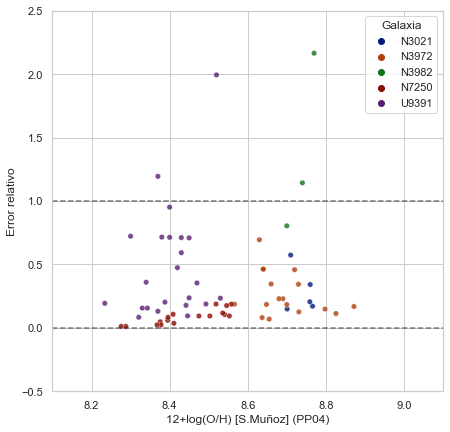

In [46]:
sns.set_theme(style="whitegrid")


g = sns.jointplot(data=df, x="12+log(O/H) [S.Muñoz] (PP04)", y="Error relativo", hue="Galaxia", space=0, 
                  ratio=5000,height=7, s=30, alpha=0.8,palette='dark', xlim=(8.1,9.1), ylim=(-0.5,2.5))

g.ax_joint.axhline(0,linestyle='--', color='black', alpha=0.5)
g.ax_joint.axhline(1,linestyle='--', color='black', alpha=0.5)

plt.tight_layout


### Ajuste lineal 

Se determina el coeficiente de correlación de Pearson de las variables.

Para hacer un ajuste entre las metalicidades se emplea el paquete polyfit, que realiza un ajuste por mínimos cuadrados, con un MC para ajustar N regresiones teniendo en cuenta los errores de las medidas


In [9]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(met_SM, met_SH0ES_O3N2)
print(f"Coeficiente de correlación Pearson: r={r}, p-value={p}")


Coeficiente de correlación Pearson: r=0.7167453837369713, p-value=1.8874536911922578e-11


0.5902281079652105 0.024397991713288075
3.4698349116083804 0.20732141579640934


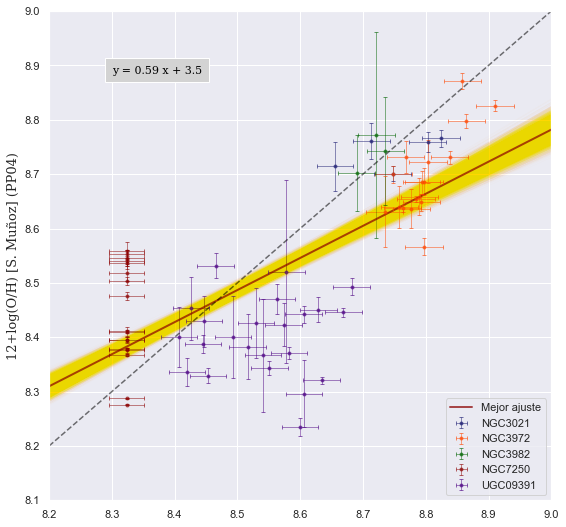

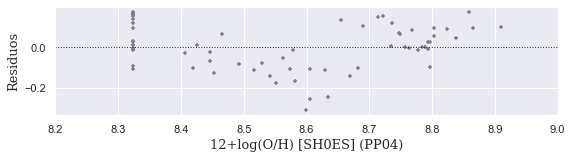

In [10]:
sns.set_theme(style="darkgrid")


fig, ax = plt.subplots(figsize=(9, 9))


met_3021_Riess_ = df.loc[df.loc[:, 'Galaxia'] == 'N3021']['12+log(O/H) [SH0ES] (PP04)']
met_3972_Riess_ = df.loc[df.loc[:, 'Galaxia'] == 'N3972']['12+log(O/H) [SH0ES] (PP04)']
met_3982_Riess_ = df.loc[df.loc[:, 'Galaxia'] == 'N3982']['12+log(O/H) [SH0ES] (PP04)']
met_7250_Riess_ = df.loc[df.loc[:, 'Galaxia'] == 'N7250']['12+log(O/H) [SH0ES] (PP04)']
met_UGC09391_Riess_ = df.loc[df.loc[:, 'Galaxia'] == 'U9391']['12+log(O/H) [SH0ES] (PP04)']

err_3021_R = df.loc[df.loc[:, 'Galaxia'] == 'N3021']['error 12+log(O/H) [SH0ES] (PP04)']
err_3972_R = df.loc[df.loc[:, 'Galaxia'] == 'N3972']['error 12+log(O/H) [SH0ES] (PP04)']
err_3982_R = df.loc[df.loc[:, 'Galaxia'] == 'N3982']['error 12+log(O/H) [SH0ES] (PP04)']
err_7250_R = df.loc[df.loc[:, 'Galaxia'] == 'N7250']['error 12+log(O/H) [SH0ES] (PP04)']
err_UGC09391_R = df.loc[df.loc[:, 'Galaxia'] == 'U9391']['error 12+log(O/H) [SH0ES] (PP04)']

met_3021 = df.loc[df.loc[:, 'Galaxia'] == 'N3021']['12+log(O/H) [S.Muñoz] (PP04)']
met_3972 = df.loc[df.loc[:, 'Galaxia'] == 'N3972']['12+log(O/H) [S.Muñoz] (PP04)']
met_3982 = df.loc[df.loc[:, 'Galaxia'] == 'N3982']['12+log(O/H) [S.Muñoz] (PP04)']
met_7250 = df.loc[df.loc[:, 'Galaxia'] == 'N7250']['12+log(O/H) [S.Muñoz] (PP04)']
met_UGC09391 = df.loc[df.loc[:, 'Galaxia'] == 'U9391']['12+log(O/H) [S.Muñoz] (PP04)']


err_3021 = df.loc[df.loc[:, 'Galaxia'] == 'N3021']['error 12+log(O/H) [S.Muñoz] (PP04)']
err_3972 = df.loc[df.loc[:, 'Galaxia'] == 'N3972']['error 12+log(O/H) [S.Muñoz] (PP04)']
err_3982 = df.loc[df.loc[:, 'Galaxia'] == 'N3982']['error 12+log(O/H) [S.Muñoz] (PP04)']
err_7250 = df.loc[df.loc[:, 'Galaxia'] == 'N7250']['error 12+log(O/H) [S.Muñoz] (PP04)']
err_UGC09391 = df.loc[df.loc[:, 'Galaxia'] == 'U9391']['error 12+log(O/H) [S.Muñoz] (PP04)']


############################################## 

# Defino el ajuste Polyfit
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results


# Montecarlo para mejor ajuste
N = 20000


mu1 = met_SH0ES_O3N2
sigma1 = err_met_SH0ES
mu2 = met_SM
sigma2 = err_met_SM

x = np.linspace(met_SH0ES_O3N2.min()-0.2,met_SH0ES_O3N2.max()+0.2)
pend_out = []
ordn_out = []
for k in range(N):   
    m_SH = np.random.normal(mu1 , sigma1) 
    m_SM = np.random.normal(mu2 , sigma2) 
    
    p_MC = polyfit(m_SH, m_SM , 1)
    y = p_MC['polynomial'][0][0]*x+p_MC['polynomial'][0][1]
    plt.plot(x, y, linewidth=0.1, color='gold', linestyle="-", alpha=0.1)
    
    pend_out.append(p_MC['polynomial'][0][0])
    ordn_out.append(p_MC['polynomial'][0][1])
pend_out = np.array(pend_out)
ordn_out = np.array(ordn_out)

pend, s_pend = scipy.stats.norm.fit(pend_out[:])
ordn, s_ordn = scipy.stats.norm.fit(ordn_out[:])

print(pend, s_pend)
print(ordn, s_ordn)

y_fit = pend * x + ordn
plt.plot(x, y_fit, linewidth=2, color='darkred', linestyle="-", alpha=0.7, label = 'Mejor ajuste')


plt.text(8.3,8.9,
         'y = '+str(round(pend,2))+' x + '+str(round(ordn,1)), 
         fontsize=11, color='black', fontfamily='serif',bbox ={'facecolor':'lightgrey','pad':7},
         verticalalignment ='top', horizontalalignment ='left')


##############################################


# Recta y=x
y_=x
plt.plot(x,y_,linestyle='--',  alpha=0.55, linewidth=1.5, color = 'black')

    
# Scatterplot metalicidades

plt.errorbar(met_3021_Riess_,met_3021, yerr=err_3021, xerr=err_3021_R , fmt='o',
             capsize=2,elinewidth=0.8,markersize=3,label="NGC3021",color='midnightblue', alpha=0.6)
plt.errorbar(met_3972_Riess_,met_3972, yerr=err_3972, xerr=err_3972_R, fmt='o',
             capsize=2,elinewidth=0.8,markersize=3,label="NGC3972",color='orangered', alpha=0.6)
plt.errorbar(met_3982_Riess_,met_3982, yerr=err_3982, xerr=err_3982_R,fmt='o',
             capsize=2,elinewidth=0.8,markersize=3,label="NGC3982",color='darkgreen', alpha=0.6)
plt.errorbar(met_7250_Riess_,met_7250, yerr=err_7250, xerr=err_7250_R,fmt='o',
             capsize=2,elinewidth=0.8,markersize=3,label="NGC7250",color='darkred', alpha=0.6)
plt.errorbar(met_UGC09391_Riess_,met_UGC09391, yerr=err_UGC09391, xerr=err_UGC09391_R, fmt='o',
             capsize=2,elinewidth=0.8,markersize=3,label="UGC09391",color='indigo', alpha=0.6)



plt.ylabel('12+log(O/H) [S. Muñoz] (PP04)', fontsize=13,fontfamily='serif')
plt.xlim(8.2,9)
plt.ylim(8.2,9)
ax.yaxis.set_ticks(np.arange(8.1, 9, 0.1))
plt.legend(loc='lower right')
plt.show()


## Residuos
y_predicted = pend*met_SH0ES_O3N2 + ordn
res = met_SM - y_predicted

fig, ax2 = plt.subplots(figsize=(9, 2))
ax2.scatter(met_SH0ES_O3N2, res, marker='+', color = "gray",s=13)
plt.axhline(color='k', ls="dotted",lw='1')
plt.xlabel('12+log(O/H) [SH0ES] (PP04)', fontsize=13,fontfamily='serif')
plt.ylabel('Residuos', fontsize=13,fontfamily='serif')
plt.xlim(8.2,9)
plt.show()


### Diferencias entre valores

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

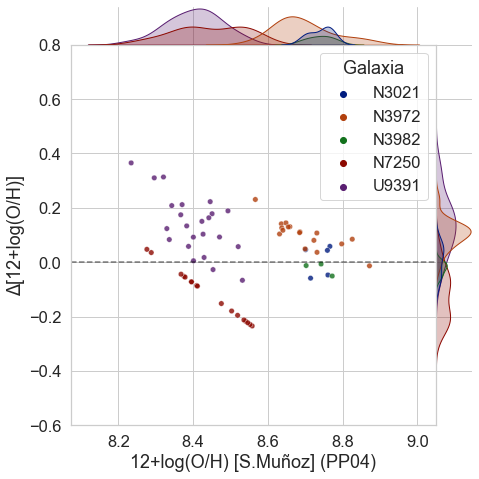

In [29]:

sns.set_theme(style="whitegrid",font_scale = 1.5)


g = sns.jointplot(data=df, x="12+log(O/H) [S.Muñoz] (PP04)", y="Δ[12+log(O/H)]", hue="Galaxia", space=0, 
                  ratio=10,height=7, s=30, alpha=0.8,ylim=(-0.6, 0.8),palette='dark')

g.ax_joint.axhline(0,linestyle='--', color='black', alpha=0.5)

plt.tight_layout


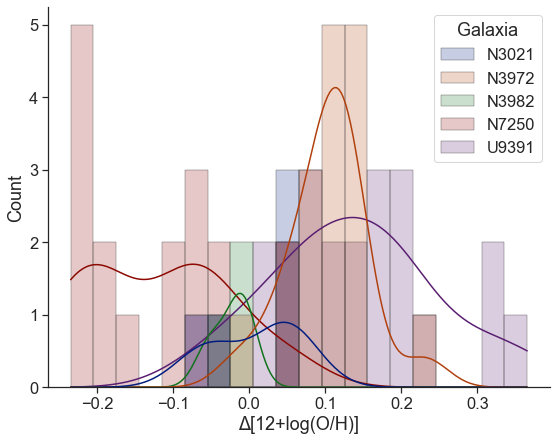

<AxesSubplot:xlabel='Δ[12+log(O/H)]', ylabel='Count'>

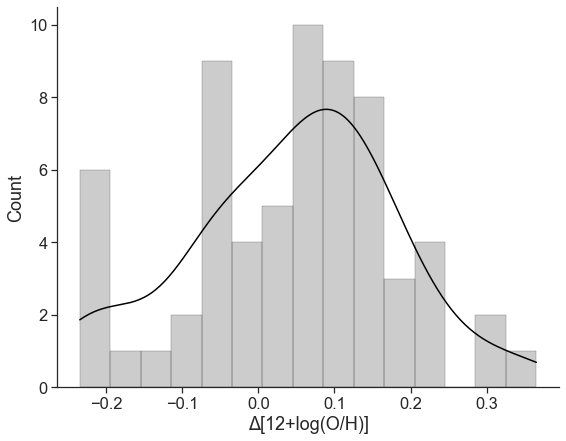

In [30]:
sns.set_theme(style="ticks",font_scale = 1.5)

f, ax = plt.subplots(figsize=(9, 7))
sns.despine(f)

sns.histplot(df,x="Δ[12+log(O/H)]", hue="Galaxia",
    kde=True,palette="dark", edgecolor=".3",linewidth=.4, bins=20, alpha=0.22)
plt.show()


f, ax = plt.subplots(figsize=(9, 7))
sns.despine(f)
sns.histplot(df,x="Δ[12+log(O/H)]",
    kde=True, color='black',edgecolor=".3",linewidth=.3, bins=15, alpha=0.2)


### Reproducir gráficas Hoffmann 


Trato de hallar también la distancia de las cefeidas sabiendo que la metalicidad de Riess salió de esos ajustes. 

Solo es posible si se conocen los gradientes, y los pasos serían:

 - Determinar el ajuste lineal de los datos
 - Hallar las distancias que se corresponden con las metalicidades de Riess (Z94)
 - Rehacer el gráfico con el ajuste y las metalicidades de Riess en Z94 (que tienen que caer encima de la recta), las de PP04 y las de este trabajo 


,Galaxia,Radius (kpc),12+log(O/H),error 12+log(O/H)
27,N3021,1.67,9.211,0.007
28,N3021,3.30,9.134,0.007
29,N3021,4.52,8.768,0.060
30,N3021,3.42,9.118,0.007
31,N3021,3.03,9.123,0.005
32,N3021,2.53,9.275,0.006
33,N3021,2.53,9.212,0.004
34,N3021,3.30,9.149,0.006
35,N3021,3.42,9.176,0.004
36,N3021,2.36,9.254,0.015


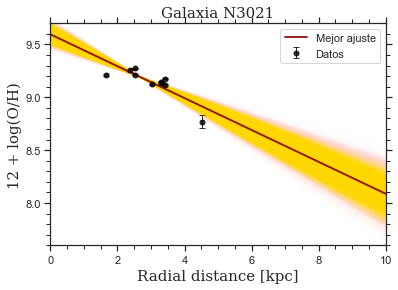

,Galaxia,Radius (kpc),12+log(O/H),error 12+log(O/H)
67,N3982,1.02,9.282,0.002
68,N3982,1.44,9.230,0.003
69,N3982,1.82,9.190,0.001
70,N3982,2.57,8.974,0.005
71,N3982,2.59,9.150,0.003
72,N3982,2.77,8.974,0.011
73,N3982,2.75,8.967,0.030
74,N3982,3.04,9.165,0.002
75,N3982,3.34,9.133,0.027
76,N3982,4.26,8.863,0.013


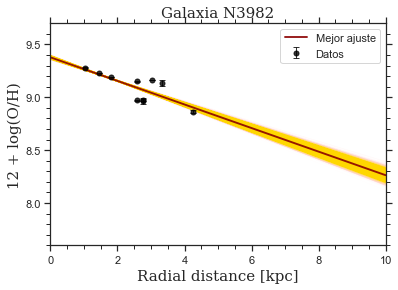

In [33]:
sns.set_theme(style="ticks")

## DataFrame con datos de Hoffmann 
data_Hoffmann = open(path+'\\Hoffmann_Table.txt', 'r')

data = data_Hoffmann.readlines()[28:215]  
name = []
radius = []
met_H = []
met_H_e = []
for linea in data:
    linea=np.array(linea.split())
    name.append(linea[0,])
    radius.append(float(linea[8,]))
    met_H.append(float(linea[9,]))
    met_H_e.append(float(linea[10,]))

name = np.array(name)
radius = np.array(radius)
met_H = np.array(met_H)
met_H_e = np.array(met_H_e)

df_H = pd.DataFrame()
df_H['Galaxia'] = name
df_H['Radius (kpc)'] = radius
df_H['12+log(O/H)'] = met_H
df_H['error 12+log(O/H)'] = met_H_e



## Plot

# Defino el ajuste Polyfit
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree, cov=True)
    results['polynomial'] = list(coeffs)
    return results


# Defino un array con el nombre de las galaxias y los divido en dataframes
#names = np.array(['N3021', 'N3972', 'N3982', 'N7250', 'U9391'])
names = np.array(['N3021','N3982'])
groups = df_H.groupby(df_H.Galaxia)
groups2 = df.groupby(df.Galaxia)

for i in names:
    gal =  groups.get_group(i)
    display(gal)
    
    fig, ax = plt.subplots(figsize=(5.7,4.2))
    
    # Datos
    plt.errorbar(gal.loc[:,'Radius (kpc)'], gal.loc[:,'12+log(O/H)'], yerr = gal.loc[:,'error 12+log(O/H)'], 
                 fmt='o',capsize=3,elinewidth=1,markersize=5,alpha=0.8, label='Datos', color='black')
     
    # Montecarlo para mejor ajuste
    N = 20000
    mu = gal.loc[:,'12+log(O/H)']
    sigma = gal.loc[:,'error 12+log(O/H)']
    r =  gal.loc[:,'Radius (kpc)'] 
    x = np.linspace(0,10)
    
    pend_out = []
    ordn_out = []
    for k in range(N):   
        met = np.random.normal(mu , sigma) 
        p_MC = polyfit(r, met , 1)
        y = p_MC['polynomial'][0][0]*x+p_MC['polynomial'][0][1]
        plt.plot(x, y, linewidth=0.05, color='gold', linestyle="-", alpha=0.1)
        pend_out.append(p_MC['polynomial'][0][0])
        ordn_out.append(p_MC['polynomial'][0][1])
    pend_out = np.array(pend_out)
    ordn_out = np.array(ordn_out)

    pend, s_pend = scipy.stats.norm.fit(pend_out[:])
    ordn, s_ordn = scipy.stats.norm.fit(ordn_out[:])

    y_fit = pend * x + ordn
    plt.plot(x, y_fit, linewidth=1.9, color='darkred', linestyle="-", alpha=0.9, label = 'Mejor ajuste')

    
    plt.title('Galaxia %s' %(i),fontsize=15,fontfamily='serif')
    plt.xlabel(r"Radial distance [kpc]", fontsize=15,fontfamily='serif')
    plt.ylabel( r"12 + log(O/H)", fontsize=15,fontfamily='serif')
    plt.ylim(7.6,9.7)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_ticks_position('both')
    plt.xlim(0,10)
    ax.xaxis.set_ticks_position('both')
    plt.minorticks_on()
    plt.legend()
    fig.tight_layout()
    plt.show()
    
    
    ######### Solo si el gradiente fuera igual #########
    
    ## Determinar la distancia radial (kpc) desde las metalicidades de Riess  
    #gal2 =  groups2.get_group(i)
    #ind2 = gal2.index
    #met_R = df[df['Galaxia'] == i]['12+log(O/H) [SH0ES] (Z94)']
    #for j in ind2[:]:
    #    df.loc[j,'Radius (kpc)'] = (met_R[j] - ordn)/pend
        
